# Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

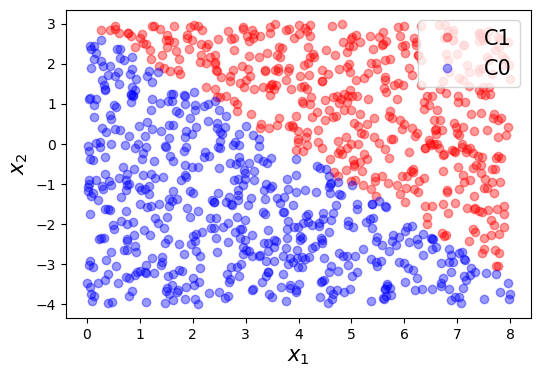

In [4]:
#training data gerneration
m = 1000
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.functional as F

In [100]:
torch_train_X = torch.from_numpy(train_X).float()
torch_train_y = torch.from_numpy(train_y).float()

In [101]:
print(torch_train_X.shape, torch_train_y.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


In [102]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.W = torch.zeros((input_dim,output_dim),requires_grad=True)
        self.b = torch.zeros(output_dim,requires_grad=True)
        
        self.act = nn.Sigmoid()
        
    def hypo(self, x):
        y = self.act((x.matmul(self.W) + self.b))
        return y

In [135]:
model = LogisticRegression(input_dim = torch_train_X.size(-1), output_dim = torch_train_y.size(-1))

In [136]:
criterion = nn.BCELoss()
optimizer = optim.Adam([model.W, model.b], lr = 0.1)

In [137]:
for i in range(100):
  pred = model.hypo(torch_train_X)
  loss = criterion(pred, torch_train_y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (i+1)%10 == 0:
    print("Epoch %d: loss=%.4e" %(i+1, loss))

Epoch 10: loss=3.1154e-01
Epoch 20: loss=2.3317e-01
Epoch 30: loss=1.9023e-01
Epoch 40: loss=1.6178e-01
Epoch 50: loss=1.4592e-01
Epoch 60: loss=1.3449e-01
Epoch 70: loss=1.2525e-01
Epoch 80: loss=1.1790e-01
Epoch 90: loss=1.1174e-01
Epoch 100: loss=1.0645e-01


In [138]:
print(model.W, model.b)

tensor([[1.5747],
        [2.1838]], requires_grad=True) tensor([-5.7508], requires_grad=True)


In [139]:
w = model.W.detach().numpy()
b = model.b.detach().numpy()

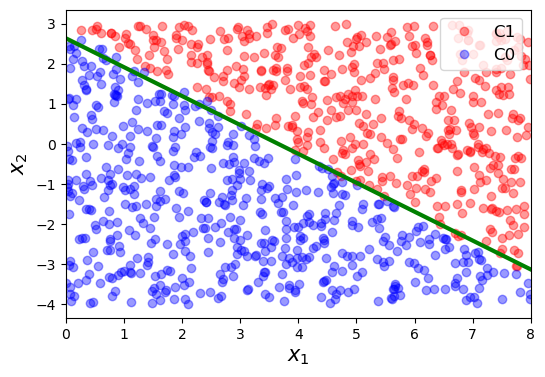

In [140]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

## Looking at Parameters

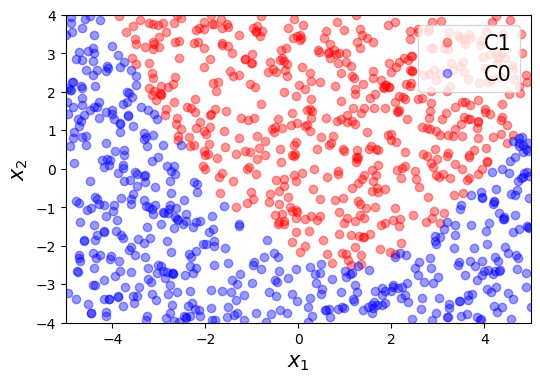

In [4]:
# training data gerneration

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

In [5]:
torch_train_X = torch.from_numpy(train_X).float()
torch_train_y = torch.from_numpy(train_y).float()
print(torch_train_X.shape, torch_train_y.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


In [24]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear1 = nn.Linear(2, 2)
    self.linear2 = nn.Linear(2, 1)
    self.act = nn.Sigmoid()

  def forward(self, x):
    x = self.act(self.linear1(x))
    y = self.act(self.linear2(x))
    return y

In [25]:
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.1)

for i in range(100):
  pred = model(torch_train_X)
  loss = criterion(pred, torch_train_y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (i+1)%100 == 0:
    print("Epoch %d: loss=%.4e" %(i+1, loss))

Epoch 100: loss=1.1365e-01


In [26]:
for name, param in model.named_parameters():
    print(name,param.shape)

linear1.weight torch.Size([2, 2])
linear1.bias torch.Size([2])
linear2.weight torch.Size([1, 2])
linear2.bias torch.Size([1])


In [40]:
w1 = model.get_parameter('linear1.weight').detach().numpy()
b1 = model.get_parameter('linear1.bias').detach().numpy()
print(w1, b1)
w2 = model.get_parameter('linear2.weight').detach().numpy()
b2 = model.get_parameter('linear2.bias').detach().numpy()
print(w2, b2)

[[-3.207849  -2.1301532]
 [-1.7733601  2.0370114]] [-6.1528583  6.9262686]
[[-6.815509   5.9627085]] [-2.5151699]


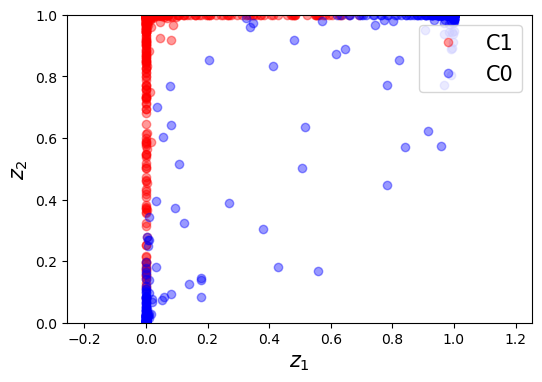

In [41]:
H = train_X*w1 + b1
H = 1/(1 + np.exp(-H))

plt.figure(figsize = (6, 4))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

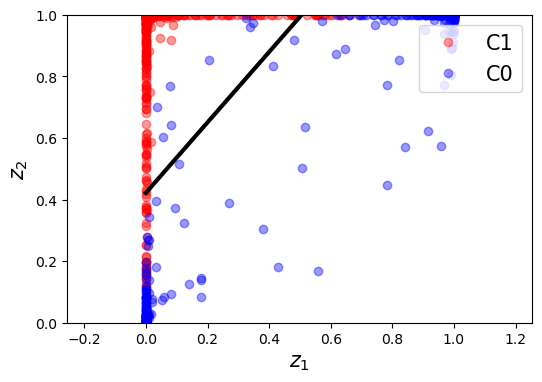

In [43]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[0,1]*x1p - b2[0]/w2[0,1]

plt.figure(figsize = (6, 4))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

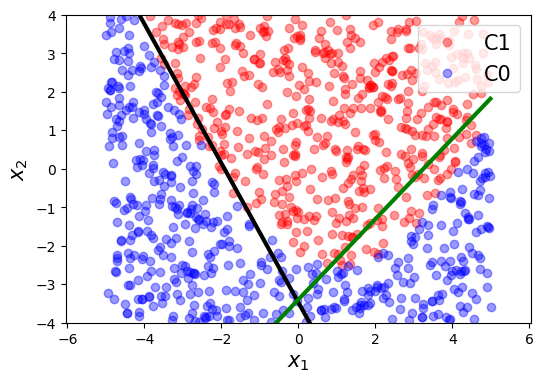

In [44]:
x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w1[0,0]/w1[1,0]*x1p - b1[0]/w1[1,0]
x3p = - w1[0,1]/w1[1,1]*x1p - b1[1]/w1[1,1]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

# ANN with MNIST

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
use_gpu = torch.cuda.is_available()
device = torch.device("cuda" if use_gpu else "cpu")
print("device: ", device)

device:  cuda


In [3]:
print('cuda index:', torch.cuda.current_device())
print('gpu 개수:', torch.cuda.device_count())
print('graphic name:', torch.cuda.get_device_name())
cuda = torch.device('cuda')
print(cuda)

cuda index: 0
gpu 개수: 1
graphic name: NVIDIA GeForce GTX 1080 Ti
cuda


In [267]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [268]:
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=100, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)
print(len(data_loader))

600


In [146]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,100)
        self.fc3 = nn.Linear(100,10)
        
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [147]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [148]:
for epoch in range(5):
    strat_time = time.time()
    for batch_idx, (image, label) in enumerate(data_loader):
            image = image.view(-1, 28*28).to(device)
            label = label.to(device)
            optimizer.zero_grad()
            output = model(image)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
    end_time = time.time()
    if epoch % 1 == 0:
        print("Train epoch: {} Train Loss: {:.6f} Time: {:.3f}".format(epoch, loss.item(),end_time-strat_time))

Train epoch: 0 Train Loss: 0.160800 Time: 6.119
Train epoch: 1 Train Loss: 0.122046 Time: 6.274
Train epoch: 2 Train Loss: 0.129297 Time: 6.615
Train epoch: 3 Train Loss: 0.025114 Time: 6.732
Train epoch: 4 Train Loss: 0.097783 Time: 6.775


Accuracy: 0.9540999531745911
Label:  1
Prediction:  1


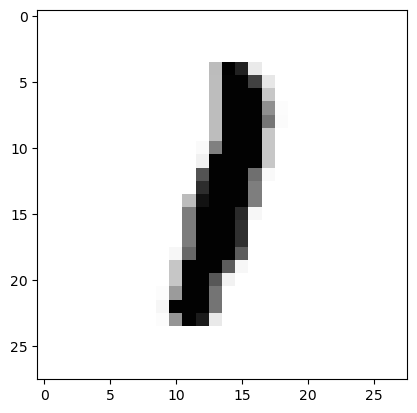

In [155]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

## Batch Normalization

torch.Size([10, 1]) torch.Size([10, 1])


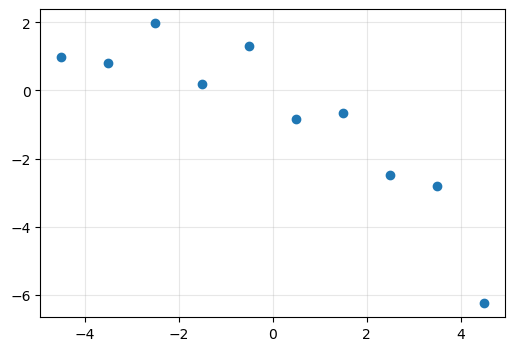

In [4]:
N = 10
data_x = np.linspace(-4.5, 4.5, N)
data_y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])

data_x = data_x.reshape(-1,1)
data_y = data_y.reshape(-1,1)

data_x = torch.from_numpy(data_x).float()
data_y = torch.from_numpy(data_y).float()

data_x_train = data_x.to(device)
data_y_train = data_y.to(device)


print(data_x.shape, data_y.shape)

plt.figure(figsize = (6, 4))
plt.plot(data_x, data_y, 'o')
plt.grid(alpha = 0.3)
plt.show()

In [5]:
class BaseModel(nn.Module):
    def __init__(self, input_size):
        super(BaseModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 30)
        self.fc2 = nn.Linear(30,100)
        self.fc3 = nn.Linear(100,100)
        self.fc4 = nn.Linear(100,30)
        self.fc5 = nn.Linear(30,1)
    def forward(self,x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.sigmoid(x)
        x = self.fc4(x)
        x = F.sigmoid(x)
        x = self.fc5(x)
        return x

In [6]:
base_model = BaseModel(1).to(device)

In [7]:
base_criterion = nn.MSELoss().to(device)
base_optimizer = torch.optim.Adam(base_model.parameters(), lr=0.001)

In [8]:
total_time = 0
for epoch in range(5000):
    strat_time = time.time()
    base_optimizer.zero_grad()
    output = base_model(data_x_train)
    loss = base_criterion(output, data_y_train)
    loss.backward()
    base_optimizer.step()
    end_time = time.time()
    total_time += end_time-strat_time
    if epoch % 500 == 0:
        print("Train epoch: {} Train Loss: {:.6f} Time: {:.3f}".format(epoch, loss.item(),end_time-strat_time))
print("Total Train Time: {:.3f}".format(total_time))

Train epoch: 0 Train Loss: 5.677173 Time: 1.355
Train epoch: 500 Train Loss: 0.269653 Time: 0.001
Train epoch: 1000 Train Loss: 0.185105 Time: 0.001
Train epoch: 1500 Train Loss: 0.176687 Time: 0.001
Train epoch: 2000 Train Loss: 0.104537 Time: 0.001
Train epoch: 2500 Train Loss: 0.080237 Time: 0.002
Train epoch: 3000 Train Loss: 0.080104 Time: 0.001
Train epoch: 3500 Train Loss: 0.080077 Time: 0.002
Train epoch: 4000 Train Loss: 0.061180 Time: 0.001
Train epoch: 4500 Train Loss: 0.001934 Time: 0.002
Total Train Time: 7.979


Total predict Time: 0.000


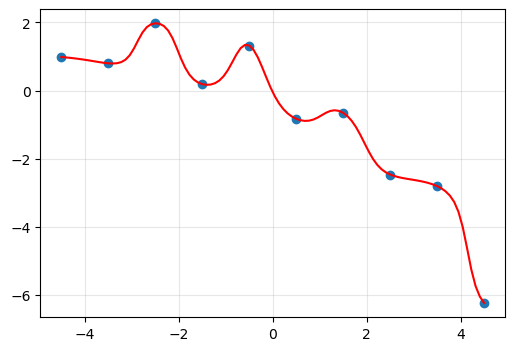

In [250]:
xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
with torch.no_grad():
    xp_pred = xp.reshape(-1,1)
    xp_pred = torch.from_numpy(xp).float().to(device)
    strat_time = time.time()
    my_pred = base_model(xp_pred)
    end_time = time.time()
    my_pred = my_pred.cpu()
print("Total predict Time: {:.3f}".format(end_time - strat_time))
my_pred = my_pred.numpy()
plt.figure(figsize = (6, 4))
plt.plot(data_x, data_y, 'o')
plt.plot(xp, my_pred, 'r')
plt.grid(alpha = 0.3)
plt.show()

**BN Implementation**

In [16]:
class BNModel(nn.Module):
    def __init__(self, input_size):
        super(BNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.fc2 = nn.Linear(30,100)
        self.bn2 = nn.BatchNorm1d(100)
        self.fc3 = nn.Linear(100,100)
        self.bn3 = nn.BatchNorm1d(100)
        self.fc4 = nn.Linear(100,30)
        self.bn4 = nn.BatchNorm1d(30)
        self.fc5 = nn.Linear(30,1)
    def forward(self,x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.sigmoid(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.sigmoid(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.sigmoid(x)
        
        x = self.fc4(x)
        x = self.bn4(x)
        x = F.sigmoid(x)
        
        x = self.fc5(x)
        return x

In [10]:
bn_model = BNModel(1).to(device)

In [11]:
bn_criterion = nn.MSELoss().to(device)
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr=0.001)

In [13]:
total_time = 0
for epoch in range(5000):
    strat_time = time.time()
    bn_optimizer.zero_grad()
    output = bn_model(data_x_train)
    loss = bn_criterion(output, data_y_train)
    loss.backward()
    bn_optimizer.step()
    end_time = time.time()
    total_time += end_time-strat_time
    if epoch % 500 == 0:
        print("Train epoch: {} Train Loss: {:.6f} Time: {:.3f}".format(epoch, loss.item(),end_time-strat_time))
print("Total Train Time: {:.3f}".format(total_time))

Train epoch: 0 Train Loss: 5.303444 Time: 0.002
Train epoch: 500 Train Loss: 0.612342 Time: 0.002
Train epoch: 1000 Train Loss: 0.319930 Time: 0.002
Train epoch: 1500 Train Loss: 0.300740 Time: 0.002
Train epoch: 2000 Train Loss: 0.264692 Time: 0.001
Train epoch: 2500 Train Loss: 0.187751 Time: 0.002
Train epoch: 3000 Train Loss: 0.311209 Time: 0.002
Train epoch: 3500 Train Loss: 0.334331 Time: 0.002
Train epoch: 4000 Train Loss: 0.253279 Time: 0.002
Train epoch: 4500 Train Loss: 0.189197 Time: 0.002
Total Train Time: 9.563


Total predict Time: 0.001


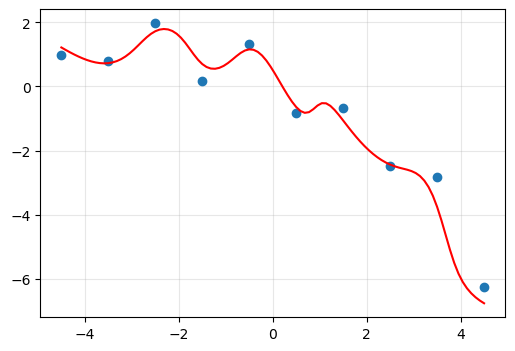

In [15]:
xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
with torch.no_grad():
    xp_pred = xp.reshape(-1,1)
    xp_pred = torch.from_numpy(xp).float().to(device)
    strat_time = time.time()
    my_pred = bn_model(xp_pred)
    end_time = time.time()
    my_pred = my_pred.cpu()
print("Total predict Time: {:.3f}".format(end_time - strat_time))
my_pred = my_pred.numpy()
plt.figure(figsize = (6, 4))
plt.plot(data_x, data_y, 'o')
plt.plot(xp, my_pred, 'r')
plt.grid(alpha = 0.3)
plt.show()

## Dropout

In [93]:
class DropoutModel(nn.Module):
    def __init__(self, input_size):
        super(DropoutModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 30)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(30,100)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(100,100)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(100,30)
        self.dropout4 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(30,1)
    def forward(self,x):
        x = self.fc1(x)
        x = self.dropout1(x)
        x = F.sigmoid(x)
        
        x = self.fc2(x)
        x = self.dropout2(x)
        x = F.sigmoid(x)
        
        x = self.fc3(x)
        x = self.dropout3(x)
        x = F.sigmoid(x)
        
        x = self.fc4(x)
        x = self.dropout4(x)
        x = F.sigmoid(x)
        
        x = self.fc5(x)
        return x

In [94]:
dropout_model = DropoutModel(1).to(device)

In [95]:
dropout_criterion = nn.MSELoss().to(device)
dropout_optimizer = torch.optim.Adam(dropout_model.parameters(), lr=0.001)

In [96]:
total_time = 0
for epoch in range(200):
    strat_time = time.time()
    dropout_optimizer.zero_grad()
    output = dropout_model(data_x_train)
    loss = dropout_criterion(output, data_y_train)
    loss.backward()
    dropout_optimizer.step()
    end_time = time.time()
    total_time += end_time-strat_time
    if epoch % 20 == 0:
        print("Train epoch: {} Train Loss: {:.6f} Time: {:.3f}".format(epoch, loss.item(),end_time-strat_time))
print("Total Train Time: {:.3f}".format(total_time))

Train epoch: 0 Train Loss: 5.912154 Time: 0.002
Train epoch: 20 Train Loss: 5.535761 Time: 0.002
Train epoch: 40 Train Loss: 5.690359 Time: 0.002
Train epoch: 60 Train Loss: 5.425502 Time: 0.002
Train epoch: 80 Train Loss: 4.992833 Time: 0.001
Train epoch: 100 Train Loss: 4.031651 Time: 0.002
Train epoch: 120 Train Loss: 2.288637 Time: 0.001
Train epoch: 140 Train Loss: 1.841211 Time: 0.002
Train epoch: 160 Train Loss: 1.586313 Time: 0.002
Train epoch: 180 Train Loss: 1.373003 Time: 0.001
Total Train Time: 0.323


Total predict Time: 0.001


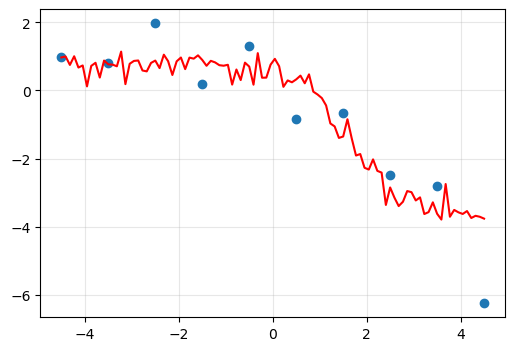

In [97]:
xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
with torch.no_grad():
    xp_pred = xp.reshape(-1,1)
    xp_pred = torch.from_numpy(xp).float().to(device)
    strat_time = time.time()
    my_pred = dropout_model(xp_pred)
    end_time = time.time()
    my_pred = my_pred.cpu()
print("Total predict Time: {:.3f}".format(end_time - strat_time))
my_pred = my_pred.numpy()
plt.figure(figsize = (6, 4))
plt.plot(data_x, data_y, 'o')
plt.plot(xp, my_pred, 'r')
plt.grid(alpha = 0.3)
plt.show()